In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns
%matplotlib inline

In [24]:
path = r"XXXX-XXXX"
con = sqlite3.connect(path)
cur = con.cursor()
forward = pd.read_sql_query("SELECT *  FROM avgPlayerStatistics AS ps WHERE ps.player_position = 'D' ;", con,)

In [25]:
pd.set_option('display.max_columns', None)
forward.describe()


,index,assists,blocks,commited_fouls,commited_penalty,conceded,drawn_fouls,dribble_attempts,dribble_past,dribble_success,fixture_id,interceptions,key_passes,minutes,missed_penalty,number,offside,on_goal_shots,pass_accuracy,player_id,rating,red,saved_penalty,saves,scored_penalty,timestamp,total_duels,total_goals,total_passes,total_shots,total_tackels,won_duels,won_penalty,yellow
count,113651.000000,113651.000000,113651.000000,113651.0,113651.000000,113651.0,113651.000000,113651.000000,113651.000000,113651.000000,113651.000000,113651.000000,113651.000000,113651.000000,113651.000000,113651.000000,113651.0,113651.000000,113651.000000,113651.000000,113651.000000,113651.000000,113651.0,113651.0,113651.000000,1.136510e+05,113651.000000,113651.000000,113651.000000,113651.000000,113651.000000,113651.000000,113651.000000,113651.000000
mean,24061.850331,0.043652,0.243546,0.0,0.022214,0.0,0.728689,0.713048,0.588873,0.440051,172259.290415,1.624403,0.443721,80.403692,0.000319,16.015132,0.0,0.129301,70.899950,24734.858004,4.805321,0.010462,0.0,0.0,0.001386,1.530947e+09,6.878424,0.036674,34.047704,0.445971,0.772971,3.954234,0.003853,0.181190
std,14435.770313,0.107703,0.381186,0.0,0.072152,0.0,0.585188,0.813660,0.480210,0.520476,202324.473391,0.937656,0.516909,15.805492,0.008061,14.219810,0.0,0.190415,19.039307,25371.685006,3.141538,0.049795,0.0,0.0,0.019508,5.483401e+07,3.629497,0.093827,14.962412,0.416596,0.901843,2.224943,0.028805,0.201682
min,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.438972e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11573.000000,0.000000,0.000000,0.0,0.000000,0.0,0.333333,0.200000,0.200000,0.000000,17319.000000,1.000000,0.000000,75.800000,0.000000,4.800000,0.0,0.000000,67.000000,1904.000000,0.000000,0.000000,0.0,0.0,0.000000,1.484411e+09,5.000000,0.000000,23.600000,0.200000,0.000000,2.600000,0.000000,0.000000
50%,23146.000000,0.000000,0.000000,0.0,0.000000,0.0,0.600000,0.400000,0.500000,0.200000,93469.000000,1.400000,0.200000,89.400000,0.000000,15.000000,0.0,0.000000,76.666667,21494.000000,6.720000,0.000000,0.0,0.0,0.000000,1.526220e+09,7.200000,0.000000,32.000000,0.400000,0.600000,4.000000,0.000000,0.200000
75%,36576.000000,0.000000,0.400000,0.0,0.000000,0.0,1.000000,1.000000,0.800000,0.600000,208994.000000,2.200000,0.600000,90.000000,0.000000,23.000000,0.0,0.200000,83.000000,37875.000000,7.000000,0.000000,0.0,0.0,0.000000,1.577390e+09,9.200000,0.000000,42.600000,0.600000,1.400000,5.400000,0.000000,0.200000
max,49980.000000,2.000000,5.000000,0.0,2.000000,0.0,6.000000,10.000000,6.000000,6.000000,705683.000000,8.500000,6.400000,105.000000,0.400000,99.000000,0.0,2.000000,108.400000,314513.000000,9.300000,1.000000,0.0,0.0,0.800000,1.622398e+09,33.000000,1.200000,117.800000,4.000000,9.000000,20.000000,1.000000,2.000000


Identifikations daten können entfernt werden. <br>
Werte die einen Durchschnitt von 0 haben sind wertlose informationen

In [26]:
def drop_columns(df):
    df.drop(columns='fixture_id', inplace=True)
    df.drop(columns='index', inplace=True)
    df.drop(columns='timestamp', inplace=True)
    df.drop(columns='player_id', inplace=True)
    df.drop(columns='number', inplace=True)
    #drop mit mean 0 
    df.drop(columns='saves', inplace=True)
    df.drop(columns='offside', inplace=True)
    df.drop(columns='conceded', inplace=True)
    df.drop(columns='commited_fouls', inplace=True)
    df.drop(columns='saved_penalty', inplace=True)
    df.drop(columns='rating', inplace=True)

drop_columns(forward)
print(len(forward.columns))



24


In [27]:
pd.set_option('display.max_columns', None)
forward.head()

,assists,blocks,commited_penalty,drawn_fouls,dribble_attempts,dribble_past,dribble_success,interceptions,key_passes,minutes,missed_penalty,on_goal_shots,pass_accuracy,player_position,red,scored_penalty,total_duels,total_goals,total_passes,total_shots,total_tackels,won_duels,won_penalty,yellow
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,90.0,0.0,0.0,83.0,D,0.0,0.0,3.0,0.0,31.0,0.0,1.0,2.0,0.0,0.0
1,0.0,0.0,0.0,0.0,5.0,3.0,2.0,3.0,0.0,90.0,0.0,0.0,82.0,D,0.0,0.0,18.0,0.0,37.0,0.0,2.0,6.0,0.0,1.0
2,0.0,2.0,0.0,1.0,2.0,1.0,1.0,3.0,0.0,90.0,0.0,0.0,83.0,D,0.0,0.0,10.0,0.0,36.0,1.0,2.0,4.0,0.0,1.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,45.0,0.0,0.0,94.0,D,0.0,0.0,2.0,0.0,17.0,0.0,1.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,90.0,0.0,0.0,93.0,D,0.0,0.0,6.0,0.0,31.0,0.0,2.0,2.0,0.0,0.0


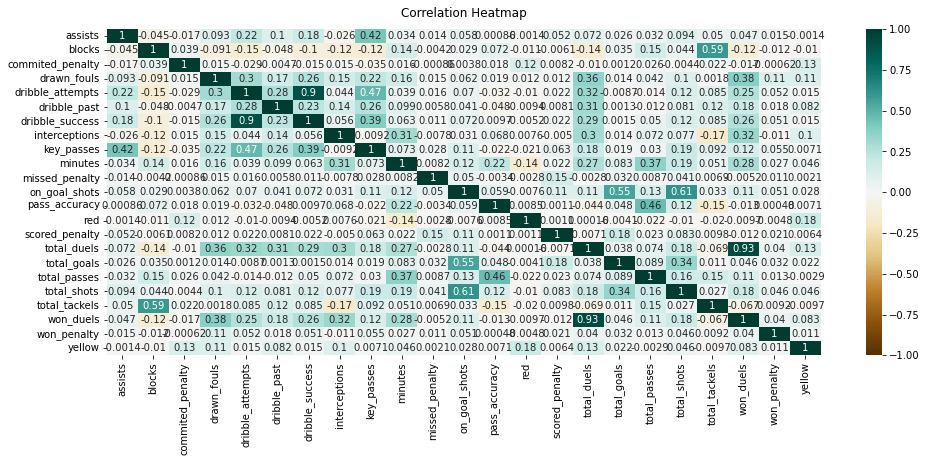

In [28]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(forward.corr(method='spearman'), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

yello, red, missed penalty, commited penalty, block haben mit den anderen werten keinen zusammenhang und können raus

In [29]:
def drop_columns_withour_corr(df):
    df.drop(columns='yellow', inplace=True)
    df.drop(columns='red', inplace=True)
    df.drop(columns='missed_penalty', inplace=True)
    df.drop(columns='commited_penalty', inplace=True)

drop_columns_withour_corr(forward)

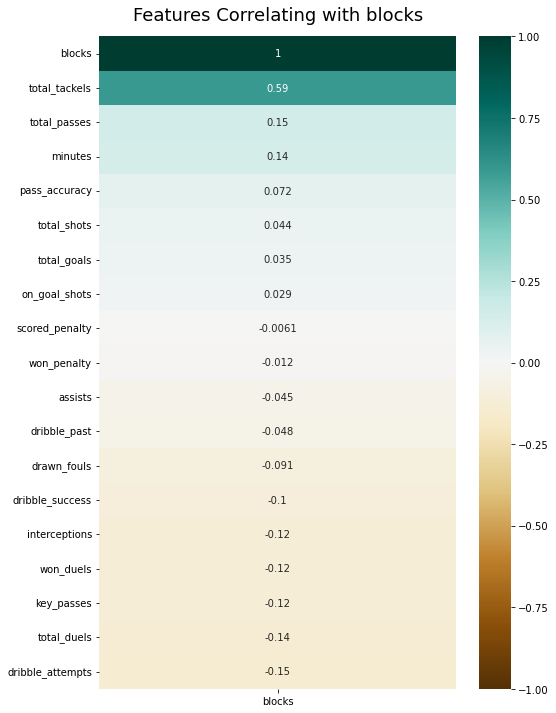

In [30]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(forward.corr(method='spearman')[['blocks']].sort_values(by='blocks', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with blocks', fontdict={'fontsize':18}, pad=16);

Je mehr totalshots geschossen werden, desto mehr Tore werden geschossen. Warum? Der Bereich zwischen erstem quantil und zweiten quantil geht immer weiter hoch

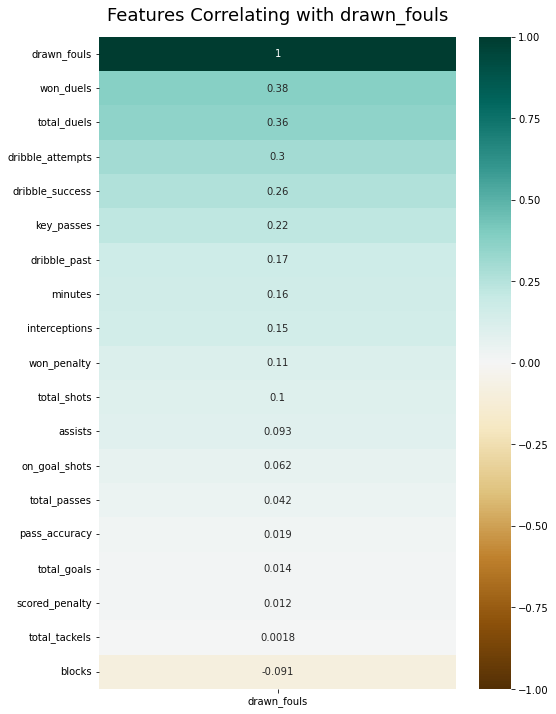

In [31]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(forward.corr(method='spearman')[['drawn_fouls']].sort_values(by='drawn_fouls', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with drawn_fouls', fontdict={'fontsize':18}, pad=16);

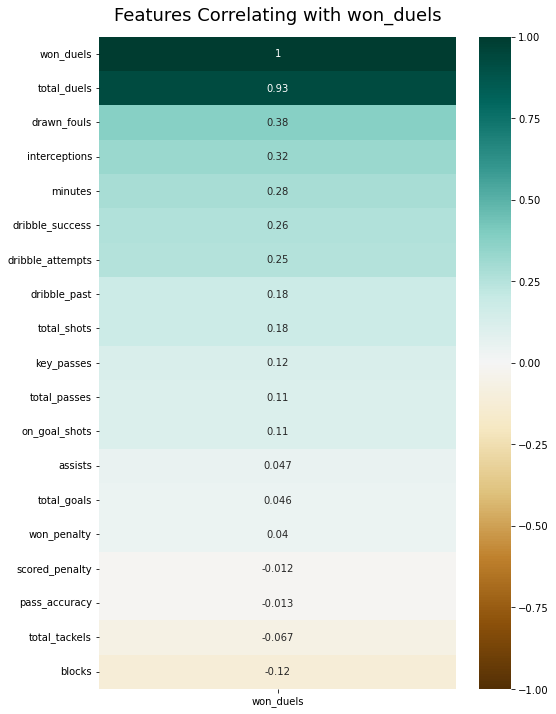

In [32]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(forward.corr(method='spearman')[['won_duels']].sort_values(by='won_duels', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with won_duels', fontdict={'fontsize':18}, pad=16);

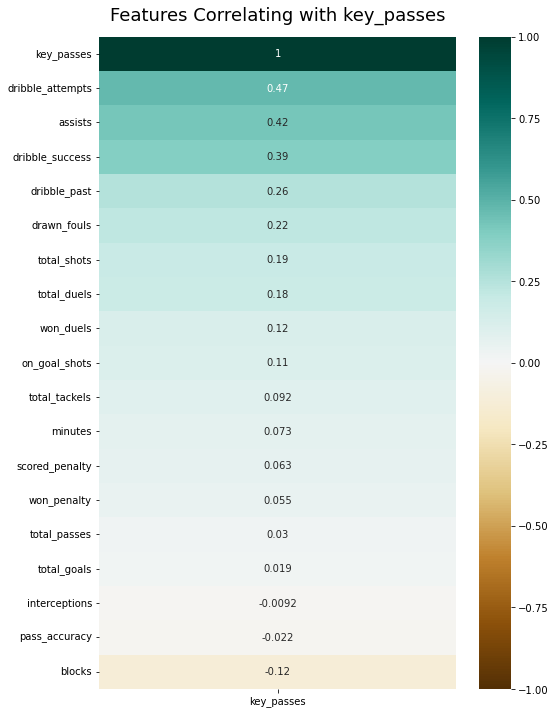

In [33]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(forward.corr(method='spearman')[['key_passes']].sort_values(by='key_passes', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with key_passes', fontdict={'fontsize':18}, pad=16);

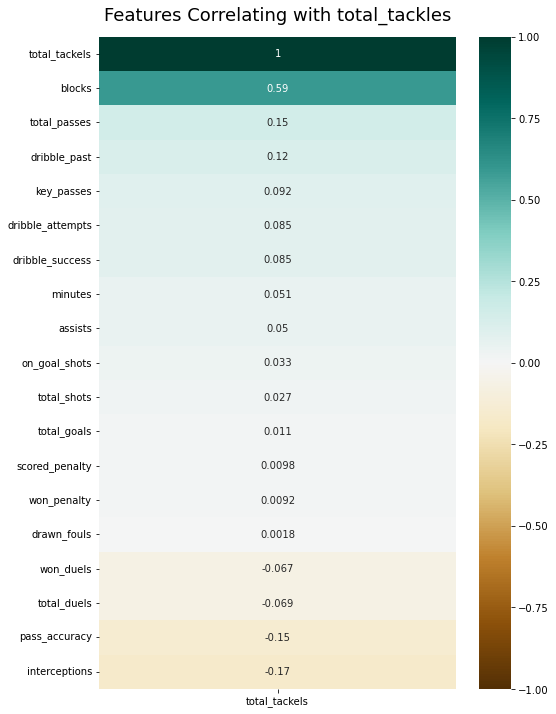

In [38]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(forward.corr(method='spearman')[['total_tackels']].sort_values(by='total_tackels', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with total_tackles', fontdict={'fontsize':18}, pad=16);

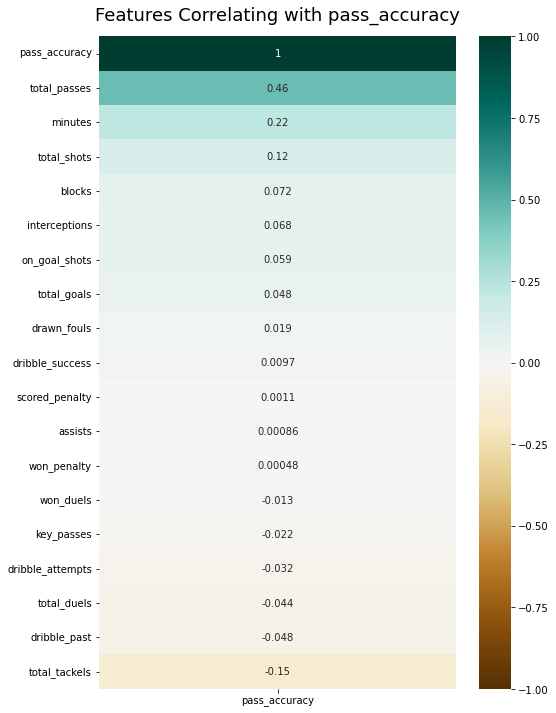

In [36]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(forward.corr(method='spearman')[['pass_accuracy']].sort_values(by='pass_accuracy', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with pass_accuracy', fontdict={'fontsize':18}, pad=16);